<div align=right>Margherita Boanini (7051199) </div>

# Laboratorio di Algoritmi
## Confronto tra gli algoritmi selection-sort e merge-sort

### Indice
* [**Introduzione**](#introduzione)
* [**Teoria**](#teoria)
    * [Analisi di un algoritmo](#analisiAlg)
    * [Il metodo divide et impera](#divideEtImpera)
    * [Merge-sort](#mergeSort)
        * [Correttezza](#correttezzaMerge)
        * [Complessità](#stabilitàMerge)
        * [Stabilità](#complessitàMerge)
    * [Selection-sort](#selectionSort)
        * [Correttezza](#correttezzaSel)
        * [Complessità](#stabilitàSel)
        * [Stabilità](#complessitàSel)
* [**Test**](#test)
    * [Descrizione dei test eseguiti](#descrizione)
    * [Generazione dei dati in ingresso](#input)
    * [Esecuzione dei test](#esecuzione)
* [**Tabelle**](#tabelle)
* [**Grafici**](#grafici)
* [**Conclusioni**](#conclusioni)

## Introduzione
<a id="introduzione"></a>

Il problema dell'ordinamento di un insieme è un problema fondamentale nell'ambito dell'informatica e dell'analisi degli algoritmi:<br>
> Dato in ingresso un insieme di *n* numeri $\{a_1, a_2,..., a_n\}$, trovare un'opportuna permutazione $\{a'_1, a'_2,...,a'_n\}$ tale che $a'_1 \leq a'_2 \leq ... \leq a'_n$.<br> 

L'obiettivo principale dell'ordinamento è quello di ottenere una rappresentazione ordinata dei dati, facilitando le operazioni di ricerca, confronto e analisi.
Esiste una grande quantità di algoritmi che permettono di risolvere tale problema e sebbene siano algoritmi progettati per risolvere lo stesso problema spesso sono notevolemente diversi nella loro efficienza.  <br>

In seguito ne esamineremo due in particolare: selection sort e merge sort, con l'obiettivo di verificare i vantaggi e gli svantaggi di entrambi. <br>

Nello studio degli algoritmi, andremo ad utilizzare dei moduli Python, importanti da ricordare: <br>
 - <code>numpy</code>  $\rightarrow$ per generare array con valori casuali (funzione utilizzata <code>numpy.random.randint()</code>).
 - <code>matplotlib</code> $\rightarrow $ per creare grafici e tabelle al fine di analizzare visivamente le prestazioni dei due algoritmi (funzioni utilizzate: <code>matplotlib.pyplot.plot()</code> e <code>matplotlib.pyplot.table()</code>).

Per installarli va eseguito il codice:

In [1]:
!pip install numpy --user --quiet
!pip install matplotlib --user --quiet

## Caratteristiche teoriche
<a id="teoria"></a>

### Analisi di un algoritmo
<a id="analisiAlg"></a>

Un algoritmo si dice **stabile** se è in grado di fornire in output risultati attendibili quando l'insieme dei dati in input cambia, sia come valori sia come quantità di dati iniziali e se la propagazione di errori dovuta ai calcoli è limitata e controllabile a priori. Gli algoritmi di ordinamento si ritengono stabili se non alterano l'ordine relativo di oggetti distinti che sono uguali rispetto alla relazione d'ordine.
<br><br>
Un algoritmo si dice **corretto** se, per ogni istanza di input, termina con l'output giusto. 
Per dimostrare la correttezza di algoritmi iterativi si usa spesso un invariante di ciclo. Diciamo che un algoritmo corretto risolve il problema computazionale dato.
<br><br>
La **complessità** di un algoritmo rappresenta l'analisi delle risorse impiegate da esso per risolvere un problema, in funzione della dimensione e del tipo di input. 
Le risorse considerate principalmente sono il tempo (utilizzato per completare l'algoritmo), lo spazio (la quantità di memoria utilizzata) e la banda (la quantità di bit spediti). Per quanto riguarda la complessità temporale, gli algoritmi di ordinamento si differenziano tra loro. <br>

|Algoritmo|Caso migliore|Caso medio| Caso peggiore|
|:---:|:---:|:---:|:---:|
|**SelectionSort**| $O(n^2)$ | $O(n^2)$ | $O(n^2)$ |
|**InsertionSort**| $O(n)$ | $O(n^2)$ | $O(n^2)$ |
|**BubbleSort**| $O(n)$ | $O(n^2)$ | $O(n^2)$ |
|**MergeSort** | $O(nlog_2n)$ | $O(nlog_2n)$ | $O(nlog_2n)$ |
|**QuickSort** | $O(nlog_2n)$ | $O(nlog_2n)$ | $O(n^2)$ |
|**HeapSort** | $O(nlog_2n)$ | $O(nlog_2n)$ | $O(nlog_2n)$ |

<br>
Il problema di ordinare una sequenza di $n$ elementi ha una delimitazione inferiore di complessità pari a $nlog_2(n)$. Algoritmi ottimi sono di tipo $O(nlog_2(n))$.

### Il metodo divide et impera
<a id="divideEtImpera"></a>

 Gli algoritmi ricorsivi sono algoritmi che chiamano se stessi in modo ricorsivo, una o più volte, per trattare sottoproblemi dello stesso tipo e risolvere così un determinato problema. Gli algoritmi ricorsivi, generalmente, adottano un approccio **divide et impera**, che prevede tre passi a ogni livello di ricorsione:
 - Divide: il problema viene diviso in un certo numero di sottoproblemi, che sono istanze più piccole dello stesso problema. 
 - Impera: i sottoproblemi vengono risolti in modo ricorsivo; quando i sottoproblemi hanno una dimensione sufficientemente piccola, essi vengono risolti direttamente.
 - Combina: le soluzioni dei sottoproblemi vengono combinate per generare la soluzione del problema originale. 

### Merge Sort
<a id="mergeSort"></a>

L'algoritmo **Merge Sort** è un algoritmo di ordinamento basato su confronti che utilizza un processo di risoluzione ricorsivo, sfruttando la tecnica del divide et impera. Opera nel modo seguente:
- Divide: divide la sequenza degli $n$ elementi da ordinare, $A[p...r]$ in due sottosequenze di $n/2$ elementi ciascuna, $A[p...q]$ e $A[q+1...r]$, dove $q$ è il punto di mezzo di $A[p..r]$.
- Impera: ordina le due sottosequenze, $A[p...q]$ e $A[q+1...r]$, in modo ricorsivo utilizzando l'algoritmo Merge Sort.
- Combina: fonde le due sottosequenze ordinate, $A[p...q]$ e $A[q+1...r]$, per generare una singola sequenza ordinata, $A[p...r]$. 

La ricorsione si ferma quando la sequenza da ordinare ha lunghezza 1, poiché una sequenza di tale lunghezza è già ordinata. 
L'operazione chiave dell'algoritmo Merge Sort è la fusione delle due sottosequenze ordinate nel passo "combina". Per effettuare la fusione utilizziamo una procedura ausiliaria $merge(A,p,q,r)$, dove $A$ è un array e $p,q$ e $r$ sono indici dell'array tali che $p\leq q<r$. La procedura assume che i sottoarray $A[p..q]$ e $A[q+1..r]$ siano ordinati; li fonde per formare un unico sottoarray ordinato che sostituisce il sottoarray corrente $A[p..r]$. 

La procedura $merge$ impiega un tempo $\Theta(n)$ dove $n = r-p+1$ è il numero totale di elementi da fondere.

In [2]:
# Implementazione di Merge Sort 
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
 
    # crea due array temporanei
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copia i dati negli array L[] e R[]
    for i in range(0, n1):
        L[i] = A[p + i]
 
    for j in range(0, n2):
        R[j] = A[q + 1 + j]
 
    # Fonde gli array temporanei in A[p..r]
    i = 0
    j = 0     
    k = p
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1
 
    # Copia gli elementi rimanenti di L[], se ce ne sono
    while i < n1:
        A[k] = L[i]
        i += 1
        k += 1
 
    # Copia gli elementi rimanenti di R[], se ce ne sono
    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1

 
def mergeSortRecursive(A, p, r):
    if p < r:
        q= p+(r-p)//2
 
        mergeSortRecursive(A, p, q)
        mergeSortRecursive(A, q + 1, r)
        merge(A, p, q, r)
        
def mergeSort(A: list):
    r = len(A)
    mergeSortRecursive(A, 0, r-1)

|<img src="https://ma-no.org/cache/galleries/contents-1830/merge_sort_algorithm.png" width="300" height="250">|
|:---:|
| Esempio di applicazione di mergeSort *(Figura 1)*|


<br>

Dunque, in pratica si spezza l'array in due parti di ugual dimensione, si ordinano separatamente queste due parti (chiamata ricorsiva), si fondono i due sottoarray ordinati così ottenuti in modo da ottenere un unico array ordinato. Il mergesort non è un algoritmo di ordinamento sul posto: oltre ad essere ricorsivo (e quindi occupare spazio sullo stack) è necessario un array ausiliare.

#### Correttezza
<a id="correttezzaMerge"></a>

Si può dimostrare la correttezza di Merge Sort per induzione su $n$. Se $n=2$ è corretto, supponiamo che sia corretto per tutti gli array con meno di $n$ elementi. Sia A un array con $n>1$ elementi ed eseguiamo l'algoritmo. Le due chiamate agiscono su un numero di elementi che è circa la metà di $n$, quindi per queste chiamate vale l'ipotesi induttiva: i due sottoarray sono ordinati al termine dell'esecuzione. Inoltre, per verificare la correttezza della procedura <code>merge</code> possiamo utilizzare l'invariante di ciclo. Dunque, Merge Sort è un algoritmo corretto.

#### Stabilità
<a id="stabilitàMerge"></a>
Merge Sort è un algoritmo stabile. Quando ci sono elementi con la stessa chiave infatti, Merge Sort assegna loro posizioni nell'array ordinato, che rispettano l'ordine in cui compaiono nell'array di input. E' fondamentale l'istruzione <code>if L[i] <= R[j]</code>, in cui l'uguale permette di scegliere sempre per primo l'elemento di sinistra, ossia quello che, precedentemente all'ordinamento, veniva prima di un altro elemento, eventualmente con chiave uguale.

#### Complessità
<a id="complessitàMerge"></a>
L'algoritmo Merge Sort, per ordinare una sequenza di $n$ elementi, ha complessità temporale $T(n) = \Theta(nlogn)$ sia nel caso medio che nel caso peggiore. Infatti:
- la funzione <code>merge</code> ha complessità temporale $\Theta(n)$:
    oltre alle righe in cui si ha un tempo costante, vi sono solo i due cicli for, che servono per copiare il sottoarray $A[p..q]$ in $L[0..n_1-1]$ e il sottoarray $A[q+1..r]$ in $R[0..n_2-1]$, che impiegano un tempo $\Theta(n_1+n_2) = \Theta(n)$.
- <code>mergeSortRecursive</code> invece richiama se stessa due volte e ogni volta su (circa) metà della sequenza in input.

Dunque il tempo di esecuzione dell'algoritmo è dato dalla ricorrenza: 
    $T(n) =\left \{ \begin{array}{rl}
    \Theta(1)\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ se\ n=1\\
    2T(n/2) + \Theta(n)\ \ \ se\ n>1
    \end{array}
    \right.$

<br>
Grazie al "teorema dell'esperto" si può dimostrare che $T(n)$ è $\Theta(nlgn)$.
Il caso migliore si ha con un array ordinato già in partenza, ma la complessità rimane la stessa.

### Selection Sort
<a id="selectionSort"></a>

**Selection Sort** è un algoritmo di ordinamento che, in ogni iterazione, seleziona l'elemento più piccolo da una lista non ordinata e lo posiziona all'inizio della stessa. L'algoritmo mantiene due sottoarray in un unico array dato. E' un algoritmo che ordina sul posto.

<u>Funzionamento</u>:
1. Imposta il primo elemento come <code>minimum</code>
2. Confronta il <code>minimum</code> con il secondo elemento. Se il secondo elemento è minore del <code>minimum</code>, imposta il secondo elemento come <code>minimum</code>. 
    Confronta il <code>minimum</code> con il terzo elemento. Di nuovo, se il terzo elemento è minore, allora assegna il <code>minimum</code> al terzo elemento, altrimenti non fa nulla. Il processo va avanti fino all'ultimo elemento.
3. Dopo ogni iterazione, il <code>minimum</code> è posizionato in cima alla lista non ordinata.
4. Per ogni iterazione, l'indicizzazione inizia dal primo elemento non ordinato. I passaggi dal primo al terzo sono ripetuti finché tutti gli elementi non sono posizionati nella loro posizione corretta.

<br>

|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-0-initial-array.png" width="200" height="100" >|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-0-comparision.png" width="200" height="100"> |
|:---:|:---:|
| 1. Select first element as minimum | 2. Compare minimum with the remaining elements |

|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-0-swapping.png" width="200" height="100" >|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-0.png" width="200" height="100"> |
|:---:|:---:|
| 3. Swap the first with minimum |  4. The first iteration|

|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-1.png" width="200" height="100" >|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-2.png" width="200" height="100"> |
|:---:|:---:|
| 4. The second iteration | 4. The third iteration|

|<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-3_1.png" width="200" height="100" >|
|:---:|
| 4. The fourth iteration | 

---
<div align="center"> Esempio di applicazione di Selection Sort <i>(Figura 2)</i> </div>

In [3]:
# Implementazione del Selection Sort
def selectionSort(A: list):
    n = len(A)
    
    for i in range(n):
        min_idx = i

        for j in range(i + 1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        tmp = A[i]
        A[i] = A[min_idx]
        A[min_idx] = tmp

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/AnimazioneSelectionSort.gif/400px-AnimazioneSelectionSort.gif">|
|:---:|
| Rappresentazione animata del funzionamento di Selection Sort in esecuzione su un array *(Figura 3)*|

#### Correttezza
<a id="correttezzaSel"></a>

Essendo un algoritmo iterativo, la correttezza del Selection Sort è dimostrabile tramite l'utilizzo dell'invariante di ciclo. 

#### Complessità
<a id="complessitàSel"></a>

Dal punto di vista delle operazioni svolte, non esiste un caso particolarmente favorevole, o al contrario, particolarmente sfavorevole: l'algoritmo esegue lo stesso numero di operazioni qualunque sia la configurazione iniziale dell'array. 
Ad ogni iterazione del ciclo più esterno, il ciclo più interno esegue esattamente $n-i$ confronti. La prima volta si cerca su n-1 elementi, la seconda su n-2, la terza su n-3 e così via... Il numero totale di confronti è:<br>
$\sum_{i=1}^{n-1} n-i = \sum_{j=1}^{n-1} j = \frac{n(n-1)}{2} = O(n^2) $ <br>
Dunque il selection sort ha complessità temporale, per tutti i casi, quadratica. Ossia $T(n) = \Theta(n^2)$.

#### Stabilità
<a id="stabilitàSel"></a>

Il selection sort non è un algoritmo stabile, poiché può invertire l'ordine di elementi della stessa chiave. 

## Test

### Descrizione dei test eseguiti
<a id="descrizione"></a>

Per valutare le prestazioni degli algoritmi di ordinamento, è necessario generare una lista di valori interi di dimensione $n$ come input e misurare il tempo di esecuzione di entrambi gli algoritmi. <br><br>
Sia per Merge Sort che per Selection Sort, il caso migliore si verifica quando l'array in input è già ordinato; quello peggiore quando bisogna ordinare in ordine crescente un array dato in ingresso, che è in ordine decrescente; mentre il caso medio si verifica quando gli elementi dell'array in input sono in ordine casuale, senza un chiaro schema ascendente o discendente. Vedremo però che i dati in ingresso non influiscono sulle prestazioni, poiché la complessità di entrambi gli algoritmi, rimane costante in tutti i casi. <br>
I test di ordinamento verranno eseguiti su un insieme di $n$ valori, con $n$ che varia da 1 a 5000. Per ciascun test verranno eseguite più prove, generando input diversi e verrà calcolato il valore medio di ogni gruppo di prove.
<br><br>
Eseguiremo prima l'algoritmo Merge Sort, seguito da Selection Sort, poiché quest'ultimo è un algoritmo che ordina sul posto, quindi sull'array in input. Se facessimo il contrario, invertendo l'ordine delle chiamate, Merge Sort riceverebbe sempre in ingresso un array già ordinato.

### Generazione dei dati in ingresso
<a id="input"></a>

Per generare gli array di input, verranno utilizzate le funzioni:
1. <code>randomArray(n)</code>, che riceve in ingresso un intero $n$ come parametro e genera un array di $n$ valori casuali compresi tra $0$ e $maxValue$.
2. <code>sortedArray(n)</code> e <code>reversedArray(n)</code>, che generano array di $n$ elementi, ordinati in modo crescente e descrescente, rispettivamente.

In [4]:
import numpy as np

#Valore massimo che può essere inserito nell'array
maxValue = 300

#Array di numeri casuali
def randomArray(n):
    return np.random.randint(0, maxValue+1, n).tolist()

#Array ordinato (crescente)
def sortedArray(n):
    return list(range(n))

#Array ordinato inversamente
def reversedArray(n):
    return list(range(n-1,-1, -1))

### Esecuzione dei test
<a id="esecuzione"></a>

I test sono ripetuti <code>nrIteration</code> volte. Ad ogni iterazione, viene generato un array di $i$ elementi, che poi verrà ordinato tramite i due algoritmi in analisi. 
Per misurare il tempo di esecuzione degli algoritmi <code>mergeSort(A:list)</code> e <code>selectionSort(A:list)</code>, viene utilizzata la funzione <code>timeit.timeit()</code>, che esegue l'algoritmo passato in ingresso un numero di volte pari a <code>nrTestPerIteration</code> (definito dal parametro <code>number</code>) e restituisce il tempo totale trascorso durante tutte le esecuzioni. Tale valore viene poi diviso per <code>nrTestPerIteration</code> e moltiplicato per 1000, per calcolare la media dei tempi ottenuti in millisecondi).

In [5]:
import timeit

nrIteration = 5000
block_size = 250
nrTestPerIteration = 250

mergeSortWorst = []
selectionSortWorst = []

mergeSortAverage = []
selectionSortAverage = []

mergeSortBest = []
selectionSortBest = []


def measureTime(function, args):
    return timeit.timeit(stmt=lambda: function(args), number=nrTestPerIteration) / nrTestPerIteration * 1000


# Caso peggiore
for i in range(1, nrIteration, block_size):
    arrayTest = reversedArray(i)
    # Test sul merge sort
    mergeSortWorst.append(measureTime(mergeSort, arrayTest))
    # Test sul selection sort
    selectionSortWorst.append(measureTime(selectionSort, arrayTest))

# Caso medio
for i in range(1, nrIteration, block_size):
    arrayTest = randomArray(i)
    # Test sul merge sort
    mergeSortAverage.append(measureTime(mergeSort, arrayTest))
    # Test sul selection sort
    selectionSortAverage.append(measureTime(selectionSort, arrayTest))

# Caso migliore
for i in range(1, nrIteration, block_size):
    arrayTest = sortedArray(i)
    # Test sul merge sort
    mergeSortBest.append(measureTime(mergeSort, arrayTest))
    # Test sul selection sort
    selectionSortBest.append(measureTime(selectionSort, arrayTest))

print("END, DEBUG")

END, DEBUG


## Tabelle
<a id="tabelle"></a>

Di seguito vengono generate le tabelle, in cui sono riportati i tempi di esecuzione dei due algoritmi nei tre casi.

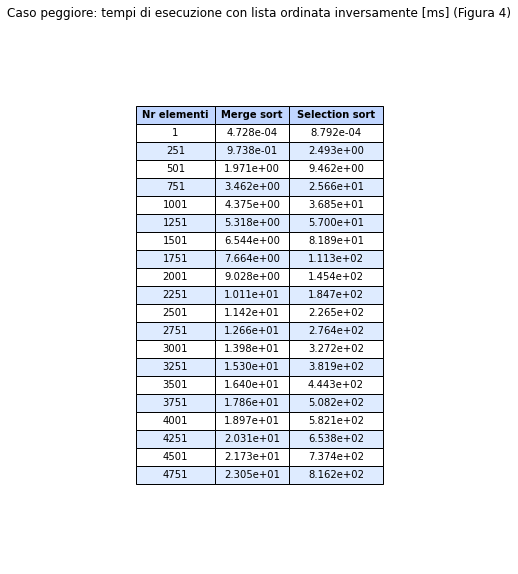

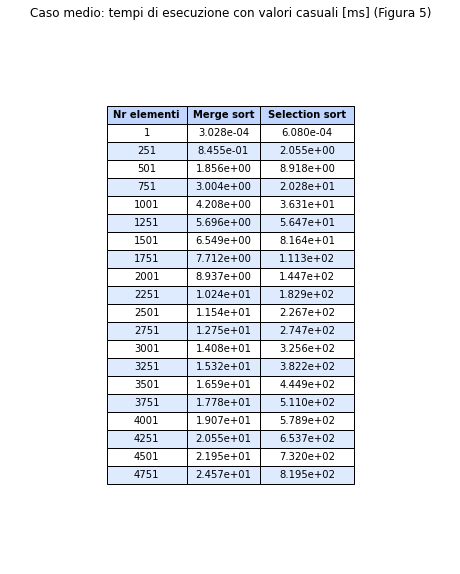

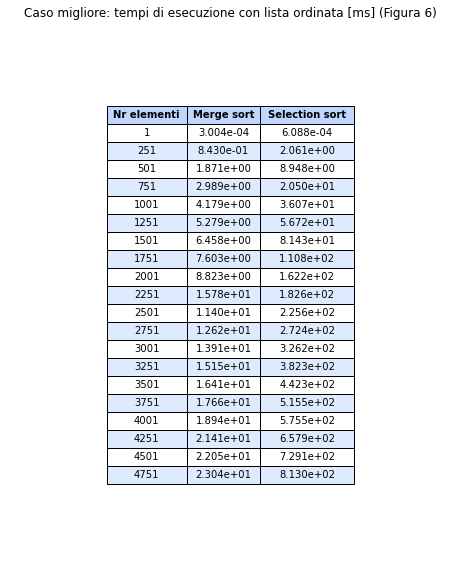

In [6]:
import matplotlib.pyplot as plt

# Prende in input una lista di colonne di dati, una tupla di intestazioni e un titolo 
def drawTables(columns: list, headers: tuple, title: str):
    fig, ax = plt.subplots(figsize=(8, 10))
    plt.title(title)

    # Unisci le liste di dati come colonne al fine di creare un array bidimensionale di dati: 'data'
    data = np.stack(tuple(columns), axis=1) 

    # Stile tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(columns))))
    table.scale(1, 1.5)

    cell_colors = {
        cell: ("#c1d6ff", {"weight": "bold"})
        if table[cell].get_text().get_text() in headers
        else ("#deebff", {})
        for cell in table._cells
        if cell[0] % 2 == 0
    }
    for cell, (color, text_props) in cell_colors.items():
        # imposta il colore della cella
        table[cell].set_facecolor(color)
        # imposta le proprietà del testo della cella
        table[cell].set_text_props(**text_props)
    plt.show()

# Generazione tabella: tempi di esecuzione caso peggiore
resultWorstCase = [
    [i for i in range(1, nrIteration, block_size)],
    ["{:.3e}".format(val) for val in mergeSortWorst],
    ["{:.3e}".format(val) for val in selectionSortWorst]
]
headersWorstCase = ("Nr elementi", "Merge sort", "Selection sort")
titleWorstCase = "Caso peggiore: tempi di esecuzione con lista ordinata inversamente [ms] (Figura 4)"

drawTables(resultWorstCase, headersWorstCase, titleWorstCase)

# Generazione tabella: tempi di esecuzione caso medio    
resultAverageCase = [
    [i for i in range(1, nrIteration, block_size)],
    ["{:.3e}".format(val) for val in mergeSortAverage],
    ["{:.3e}".format(val) for val in selectionSortAverage]
]
headersAverageCase = ("Nr elementi", "Merge sort", "Selection sort")
titleAverageCase = "Caso medio: tempi di esecuzione con valori casuali [ms] (Figura 5)"

drawTables(resultAverageCase, headersAverageCase, titleAverageCase)

# Generazione tabella: tempi di esecuzione caso migliore    
resultBestCase = [
    [i for i in range(1, nrIteration, block_size)],
    ["{:.3e}".format(val) for val in mergeSortBest],
    ["{:.3e}".format(val) for val in selectionSortBest]
]
headersBestCase = ("Nr elementi", "Merge sort", "Selection sort")
titleBestCase = "Caso migliore: tempi di esecuzione con lista ordinata [ms] (Figura 6)"

drawTables(resultBestCase, headersBestCase, titleBestCase)

## Grafici
<a id="grafici"></a>

Di seguito vengono generati i grafici, 

In [7]:
def tracePlots(left_data, right_data, plot_title: str = None):
    x = np.linspace(1, nrIteration, len(left_data))
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Selection sort, grafico a sinistra
    left.plot(x, left_data, color='red')
    left.set_title('Selection Sort')
    left.set_xlabel('Dimensione della lista [n]')
    left.set_ylabel('Tempo di esecuzione [ms]')
    

    # Merge sort, grafico a destra
    right.plot(x, right_data, color='purple')
    right.set_title('Merge Sort')
    right.set_xlabel('Dimensione della lista [n]')
    right.set_ylabel('Tempo di esecuzione [ms]')
    
    
    if plot_title:
        fig.suptitle(plot_title, fontsize=16)

def draw2Plots(y1, y2, plot_title: str):
    x = np.linspace(1, nrIteration, len(selectionSortAverage))
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(x, y1, 'r', label='Selection Sort')
    ax.plot(x, y2, 'm', label='Merge Sort')
    ax.set_xlabel('Dimensione della lista')  
    ax.set_ylabel('Tempo di esecuzione [ms]')
    ax.legend()
    plt.subplots_adjust(left=0.1, right=0.9)
    
    if plot_title:
        fig.suptitle(plot_title, fontsize=16)

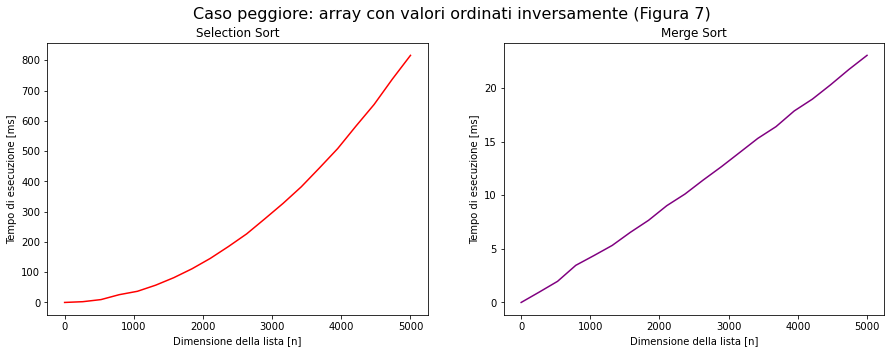

In [8]:
tracePlots(selectionSortWorst, mergeSortWorst, "Caso peggiore: array con valori ordinati inversamente (Figura 7)")

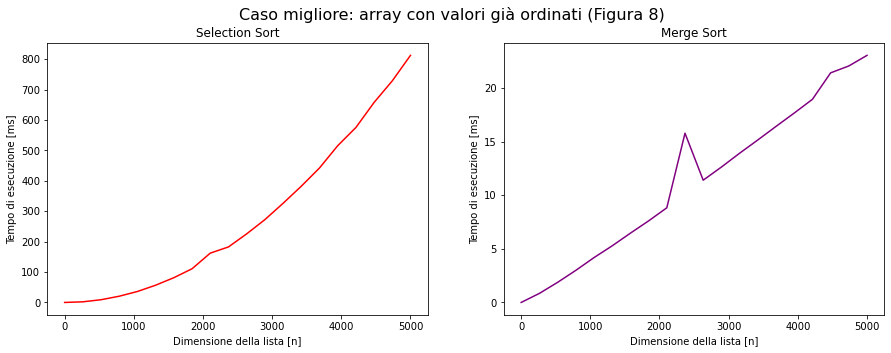

In [9]:
tracePlots(selectionSortBest, mergeSortBest, "Caso migliore: array con valori già ordinati (Figura 8)")

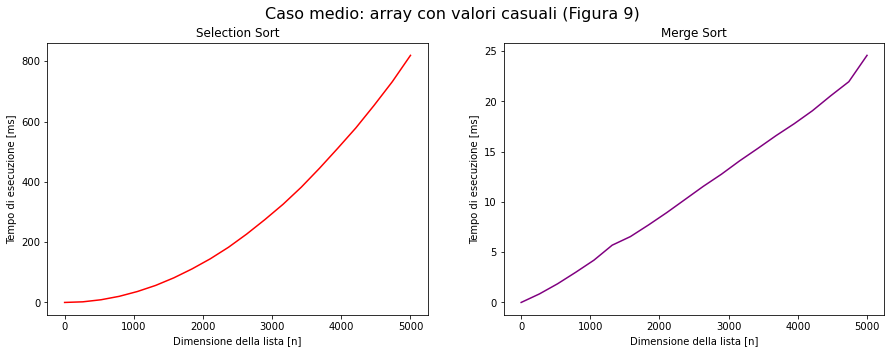

In [10]:
tracePlots(selectionSortAverage, mergeSortAverage, "Caso medio: array con valori casuali (Figura 9)")

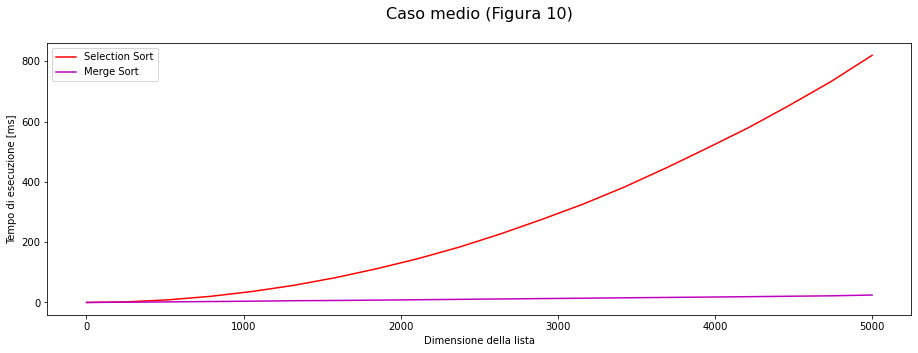

In [11]:
draw2Plots(selectionSortAverage, mergeSortAverage, "Caso medio (Figura 10)")

## Conclusioni
<a id="conclusioni"></a>

Le prestazioni dei due algoritmi di ordinamento, Merge Sort e Selection Sort, sono state valutate mediante la generazione di tabelle e grafici. Questi ultimi evidenziano chiaramente i vantaggi e gli svantaggi di ciascun algoritmo e il loro comportamento al variare della dimensione dei dati da ordinare.
<br><br>
Abbiamo potuto verificare che i dati in ingresso non influiscono sulle prestazioni, poiché la complessità di entrambi gli algoritmi, rimane costante in tutti i casi: $\Theta(nlgn)$ per Merge Sort e $O(n^2)$ per Selection Sort.
I risultati ottenuti, analizzando i grafici e le tabelle, rispecchiano quelli attesi con quanto affermato nella parte teorica.

Il grafico di Figura 10, in cui viene messo a confronto l'andamento di Merge Sort e quello di Selection Sort nel caso medio (che rispecchia anche gli altri due casi) mostra che:
* per input di dimensioni sufficientemente grandi, la funzione logaritmica cresce più lentamente di qualsiasi funzione lineare; dunque, l'algoritmo Merge Sort è preferibile, in quanto supera le prestazioni del Selection Sort;
* per input di piccole dimensioni, invece, risulta l'inverso e quindi si prediligerà il Selection Sort.

### Merge Sort

La funzione logaritmica cresce più lentamente di qualsiasi funzione lineare, per input sufficientemente grandi. Dunque, l'algoritmo mergesort, con il suo tempo di esecuzione $\Theta(nlgn)$, supera le prestazioni di molti algoritmi di ordinamento, come Selection Sort. Cosa che però risulterà inversa nel caso di input di piccole dimensioni. 
E' un algoritmo molto intuitivo ed estremamente semplice. Nella pratica è utile quando l'insieme da ordinare è abbastanza piccolo e dunque può essere utilizzato anche un algoritmo non molto efficiente con il vantaggio di non rendere troppo sofisticata la codifica del programma che lo implementa.